### DoRothEA VS CollecTRI

&emsp;&emsp;&emsp;



<br></br>

### **Data Preparation**

In [4]:
# # Install necessary libraries
# %pip install scanpy
# %pip install decoupler
# %pip install pydeseq2
# %pip install adjustText
# %pip install omnipath
# %pip install matplotlib-venn

<!-- # Install necessary libraries
%pip install scanpy
%pip install decoupler
%pip install pydeseq2
%pip install adjustText
%pip install omnipath -->

In [5]:
# Import Necessary libraries
import scanpy as sc
import decoupler as dc
import omnipath as op

# Data Manipulation
import numpy as np
import pandas as pd
from anndata import AnnData
from scipy import stats

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.colors import ListedColormap

# Differential Expression Analysis (DESeq2)
from pydeseq2.dds import DeseqDataSet


import warnings
warnings.filterwarnings("ignore")

import os
if not os.path.exists("datasets"):
    os.makedirs("datasets")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/heng/miniconda3/envs/decoupler_heng/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Retrieve CollecTRI gene regulatory network
try:
    collectri = dc.get_collectri(organism='human', split_complexes=False)
    collectri.to_csv("datasets/collectri.csv",index=False)
except:
    collectri = pd.read_table("datasets/collectri.csv", sep=',')
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [7]:
# Retrieve DoRothEA gene regulatory network
try:
    # dorothea = dc.get_dorothea(organism='human')
    dorothea['weight'] = np.sign(dorothea['weight'])
    dorothea.to_csv("datasets/dorothea.csv",index=False)
except:
    dorothea = pd.read_table("datasets/dorothea.csv", sep=',')
    dorothea['weight'] = np.sign(dorothea['weight'])
dorothea

,source,confidence,target,weight
0,MYC,A,TERT,1.0
1,FOS,A,NTS,1.0
2,FOS,A,NTF3,1.0
3,FOS,A,NFKB1,-1.0
4,FOS,A,NEFL,1.0
...,...,...,...,...
32270,LEF1,C,NKD1,1.0
32271,LEF1,C,NETO2,1.0
32272,LEF1,C,MYO18B,1.0
32273,LEF1,C,PHLDB2,1.0


In [8]:
# Download GSE186341 Data
df_gse186341 = pd.read_csv("datasets/GSE186341__deresults_deseqfiltered.csv", sep=",", index_col=0).T
df_gse186341

ID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
DU145_AZD5363_v_DU145_DMSO,NaN,1.388290,NaN,NaN,NaN,NaN,NaN,NaN,-0.685083,NaN,...,0.626731,0.752848,NaN,-1.367168,-0.493515,0.235048,-0.752776,-2.496335,-1.034335,0.457740
PANC1_AFATINIB_v_PANC1_DMSO,NaN,0.397981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.742715,-1.219882,NaN,NaN,-1.562164,NaN,0.554136,0.836142,0.869692,-0.240313
HCC1143_TIVANTINIB_v_HCC1143_DMSO,NaN,-0.489952,NaN,NaN,NaN,NaN,NaN,NaN,0.457873,NaN,...,0.273729,0.103023,NaN,NaN,0.723085,NaN,0.153537,-0.521075,0.272643,0.667981
PANC1_CRIZOTINIB_v_PANC1_DMSO,NaN,2.251490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.624936,-0.000303,NaN,NaN,0.724345,NaN,0.516557,-0.882671,0.381799,0.455217
PANC1_MK2206_v_PANC1_DMSO,NaN,-0.552421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.797144,0.061272,NaN,NaN,1.443461,NaN,-0.163740,0.519291,0.782504,-0.080141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.981341,-1.058985,NaN,NaN,NaN,NaN,2.415272,-0.707890,-0.701863,0.009879
HCC1143_AZD5363_v_HCC1143_DMSO,NaN,-1.519386,NaN,NaN,NaN,NaN,NaN,NaN,-0.131585,NaN,...,-2.465480,-0.905809,NaN,NaN,-0.636081,NaN,1.302778,0.750566,0.924691,0.732722
HF2597_MK2206_v_HF2597_DMSO,2.023806,0.280534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.909432,-0.373079,NaN,-1.189409,0.367076,NaN,0.668076,0.374469,-0.427420,0.397206
PANC1_BOSUTINIB_v_PANC1_DMSO,NaN,-0.099218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.944181,0.168055,NaN,NaN,1.299756,NaN,0.085410,0.766960,-0.513396,0.453244


### **TF Calculation**

#### Calculate the TF activity

In [9]:
# Create empty dataframes for storing results
df_collectri_acts = pd.DataFrame()
df_collectri_pvals = pd.DataFrame()
df_dorothea_acts = pd.DataFrame()
df_dorothea_pvals = pd.DataFrame()

# Loop through each row of df_gse186341
for _, row in df_gse186341.iterrows():
    # Drop NaN values
    mat = row.dropna().to_frame().T  # Convert series back to DataFrame with dropped NaN
    
    # Run the function for collectri
    tf_collectri_acts, tf_collectri_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
    
    # Run the function for dorothea
    tf_dorothea_acts, tf_dorothea_pvals = dc.run_ulm(mat=mat, net=dorothea, verbose=True)
    
    # Append results to the respective dataframes
    df_collectri_acts = pd.concat([df_collectri_acts, tf_collectri_acts], axis=0)
    df_collectri_pvals = pd.concat([df_collectri_pvals, tf_collectri_pvals], axis=0)
    df_dorothea_acts = pd.concat([df_dorothea_acts, tf_dorothea_acts], axis=0)
    df_dorothea_pvals = pd.concat([df_dorothea_pvals, tf_dorothea_pvals], axis=0)


Running ulm on mat with 1 samples and 11319 targets for 573 sources.
Running ulm on mat with 1 samples and 11319 targets for 276 sources.
Running ulm on mat with 1 samples and 10862 targets for 572 sources.
Running ulm on mat with 1 samples and 10862 targets for 280 sources.
Running ulm on mat with 1 samples and 11818 targets for 622 sources.
Running ulm on mat with 1 samples and 11818 targets for 283 sources.
Running ulm on mat with 1 samples and 10837 targets for 572 sources.
Running ulm on mat with 1 samples and 10837 targets for 280 sources.
Running ulm on mat with 1 samples and 10857 targets for 575 sources.
Running ulm on mat with 1 samples and 10857 targets for 280 sources.
Running ulm on mat with 1 samples and 11890 targets for 612 sources.
Running ulm on mat with 1 samples and 11890 targets for 283 sources.
Running ulm on mat with 1 samples and 10162 targets for 535 sources.
Running ulm on mat with 1 samples and 10162 targets for 275 sources.
Running ulm on mat with 1 samples 

In [10]:
df_collectri_acts

,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,TOX3,HOPX,ETV2,ELF2,FEV,SALL1,MYT1,ZFX,MNX1,SETBP1
DU145_AZD5363_v_DU145_DMSO,0.576391,0.313342,-1.465099,-1.571703,-2.189390,-0.253578,0.239259,1.716455,1.749306,-1.303459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_AFATINIB_v_PANC1_DMSO,-0.824977,0.369159,1.071127,0.628135,1.149997,-0.660158,-2.844814,-1.374043,1.394538,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_TIVANTINIB_v_HCC1143_DMSO,-0.242661,-1.169459,-1.349713,-0.619846,-0.350687,0.162608,-0.135649,1.677687,-0.359353,1.641334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_CRIZOTINIB_v_PANC1_DMSO,-1.416181,-0.055082,2.491645,-2.232288,0.775669,-1.643589,-2.751242,-1.216370,1.043051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_MK2206_v_PANC1_DMSO,0.369553,-0.777148,-1.134298,1.252283,2.284807,-0.962516,-0.071933,1.508754,1.420677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,0.969791,1.426302,0.484034,0.127050,-1.524524,3.636555,0.702857,1.592032,1.643179,-0.206159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_AZD5363_v_HCC1143_DMSO,0.589054,0.375367,-1.224360,-0.826161,-0.272502,1.451188,-0.533359,-1.664945,-1.177217,-0.779384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HF2597_MK2206_v_HF2597_DMSO,-0.471677,-1.723235,-1.964208,-1.967883,1.169104,-0.659350,1.921837,1.260265,-1.571305,0.453959,...,-1.527809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_BOSUTINIB_v_PANC1_DMSO,-2.083738,-0.298484,1.354506,-0.496302,0.082580,-1.287115,-1.648785,-0.092333,1.881160,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_collectri_pvals

,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,ARID4A,...,TOX3,HOPX,ETV2,ELF2,FEV,SALL1,MYT1,ZFX,MNX1,SETBP1
DU145_AZD5363_v_DU145_DMSO,0.564363,0.754027,0.142922,0.116047,0.028589,0.799826,0.810909,0.086106,0.080265,0.192445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_AFATINIB_v_PANC1_DMSO,0.409403,0.712017,0.284136,0.529928,0.250170,0.509167,0.004452,0.169457,0.163184,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_TIVANTINIB_v_HCC1143_DMSO,0.808272,0.242242,0.177134,0.535371,0.725830,0.870830,0.892101,0.093435,0.719337,0.100755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_CRIZOTINIB_v_PANC1_DMSO,0.156751,0.956074,0.012730,0.025616,0.437961,0.100290,0.005947,0.223870,0.296948,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_MK2206_v_PANC1_DMSO,0.711723,0.437088,0.256694,0.210494,0.022343,0.335812,0.942657,0.131391,0.155439,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,0.332177,0.153816,0.628373,0.898904,0.127413,0.000278,0.482163,0.111412,0.100381,0.836671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_AZD5363_v_HCC1143_DMSO,0.555836,0.707394,0.220841,0.408730,0.785241,0.146754,0.593795,0.095950,0.239133,0.435769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HF2597_MK2206_v_HF2597_DMSO,0.637166,0.084872,0.049529,0.049104,0.242385,0.509684,0.054650,0.207598,0.116138,0.649866,...,0.126586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_BOSUTINIB_v_PANC1_DMSO,0.037207,0.765340,0.175603,0.619691,0.934187,0.198082,0.099221,0.926435,0.059977,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_dorothea_acts

,AHR,AR,ARID2,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,...,RARG,GLI1,HIC1,SNAI1,STAT6,HES1,IRF8,YBX1,HNF1A,RXRB
DU145_AZD5363_v_DU145_DMSO,-1.277743,-0.389756,-2.154629,-3.202786,-2.257102,0.933693,-0.169655,-1.828778,-2.916679,-4.082260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_AFATINIB_v_PANC1_DMSO,-1.048669,-2.041943,-0.601243,-1.076548,0.134711,-1.387388,-1.160170,-0.447542,0.624391,0.039480,...,-0.351518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_TIVANTINIB_v_HCC1143_DMSO,-1.680458,-0.987101,-0.310142,0.625546,-2.488832,0.262623,0.183694,0.296501,-0.662161,-3.278494,...,0.309193,-1.503859,0.483405,2.042488,0.814406,NaN,NaN,NaN,NaN,NaN
PANC1_CRIZOTINIB_v_PANC1_DMSO,-0.337402,-3.456243,-1.015697,-1.281564,0.515998,-1.451040,-0.844423,-0.285264,-0.671746,0.195193,...,-0.266034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PANC1_MK2206_v_PANC1_DMSO,-1.663481,0.256444,-0.566093,0.420826,-0.541535,-0.867403,2.308927,-0.065950,0.430794,-1.384150,...,0.694237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,2.872131,2.612339,1.232357,-0.285107,3.852771,1.861744,0.771395,2.209802,1.000942,-0.361664,...,0.383499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCC1143_AZD5363_v_HCC1143_DMSO,1.107871,-0.624524,1.535971,0.221509,0.602030,-0.747725,1.307021,1.508612,-1.488379,0.314682,...,0.334235,NaN,-1.686549,-0.374167,0.261156,NaN,NaN,NaN,NaN,NaN
HF2597_MK2206_v_HF2597_DMSO,1.500650,0.959114,3.783652,0.468039,0.012123,1.240945,2.099940,1.599020,-0.651341,1.850398,...,-0.601000,-0.006902,-0.018134,NaN,-1.585617,-0.20811,NaN,-0.267064,NaN,NaN
PANC1_BOSUTINIB_v_PANC1_DMSO,-2.227330,-1.438500,-1.680934,-1.127290,-1.248110,-0.241495,-0.539429,0.171828,-1.414202,-0.607491,...,0.949724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dorothea_pvals

In [13]:
# Filter p-value < 0.05 in collectri TF activity
tf_collectri_acts_filtered = df_collectri_acts.loc[:, df_collectri_pvals.lt(0.05).all()]
tf_collectri_acts_filtered.shape

(352, 0)

In [14]:
# Filter p-value < 0.05 in dorothea TF activity
tf_dorothea_acts_filtered = df_dorothea_acts.loc[:, df_dorothea_pvals.lt(0.05).all()]
tf_dorothea_acts_filtered.shape

(352, 0)

#### Classify the Overlap TF into groups (by significant)

all_collectri: 672
all_dorothea: 289

acts_collectri: 416
acts_dorothea: 33
acts_both: 256
acts_none: 0
acts_sum: 705


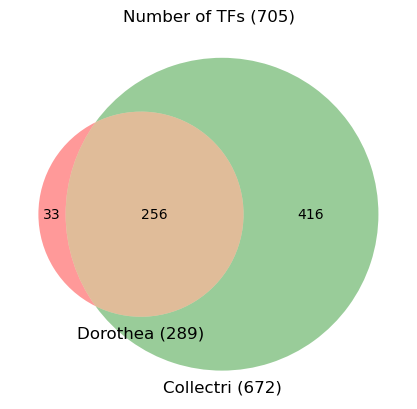

In [15]:
significant_tf_collectri = df_collectri_pvals.columns #[(df_collectri_pvals < 0.05).all()]
significant_tf_dorothea = df_dorothea_pvals.columns   #[(df_dorothea_pvals < 0.05).all()]

# Find the overlapping TFs between collectri and dorothea
overlap_tfs = set(df_collectri_acts.columns) & set(df_dorothea_acts.columns)

# Classify into 4 groups
# acts_collectri = overlap_tfs & set(significant_tf_collectri) - set(significant_tf_dorothea)
# acts_dorothea = overlap_tfs & set(significant_tf_dorothea) - set(significant_tf_collectri)
acts_collectri = set(significant_tf_collectri) - set(overlap_tfs)
acts_dorothea = set(significant_tf_dorothea) - set(overlap_tfs)
acts_both = overlap_tfs & set(significant_tf_collectri) & set(significant_tf_dorothea)
acts_none = overlap_tfs - acts_collectri - acts_dorothea - acts_both

# Convert set objects to lists
acts_collectri = list(acts_collectri)
acts_dorothea = list(acts_dorothea)
acts_both = list(acts_both)
acts_none = list(acts_none)

# Print the result
print(f"all_collectri: {len(df_collectri_pvals.columns):d}")
print(f"all_dorothea: {len(df_dorothea_pvals.columns):d}")
print("")
print(f"acts_collectri: {len(acts_collectri):d}")
print(f"acts_dorothea: {len(acts_dorothea):d}")
print(f"acts_both: {len(acts_both):d}")
print(f"acts_none: {len(acts_none):d}")
print(f"acts_sum: {len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d}")

# Plot Venn Diagram
venn = venn3(subsets={
    '100': len(acts_dorothea),  # Only Dorothea
    '010': len(acts_collectri),  # Only Collectri
    '110': len(acts_both),  # Significant in both
    # '001': len(acts_none)  # Not significant in either
}, set_labels=(f'Dorothea ({len(significant_tf_dorothea):d})', f'Collectri ({len(significant_tf_collectri):d})')) #, f'None ({len(acts_none):d})'
plt.title(f'Number of TFs ({len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d})')
plt.show()

all_collectri: 466
all_dorothea: 268

acts_collectri: 256
acts_dorothea: 58
acts_both: 210
acts_none: 0
acts_sum: 524


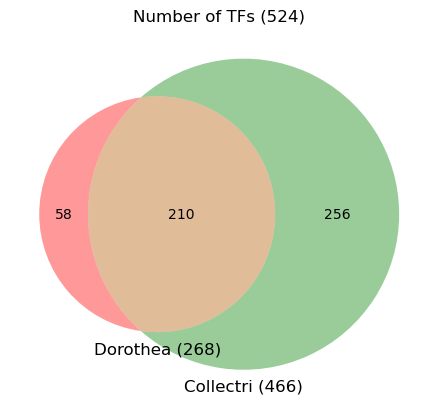

In [16]:
significant_tf_collectri = df_collectri_acts.dropna(axis=1).columns
significant_tf_dorothea = df_dorothea_acts.dropna(axis=1).columns

# Find the overlapping TFs between collectri and dorothea
overlap_tfs = set(significant_tf_collectri) & set(significant_tf_dorothea)

# Classify into 4 groups
acts_collectri = set(significant_tf_collectri) - set(overlap_tfs)
acts_dorothea = set(significant_tf_dorothea) - set(overlap_tfs)
acts_both = overlap_tfs & set(significant_tf_collectri) & set(significant_tf_dorothea)
acts_none = overlap_tfs - acts_collectri - acts_dorothea - acts_both

# Convert set objects to lists
acts_collectri = list(acts_collectri)
acts_dorothea = list(acts_dorothea)
acts_both = list(acts_both)
acts_none = list(acts_none)

# Print the result
print(f"all_collectri: {len(significant_tf_collectri):d}")
print(f"all_dorothea: {len(significant_tf_dorothea):d}")
print("")
print(f"acts_collectri: {len(acts_collectri):d}")
print(f"acts_dorothea: {len(acts_dorothea):d}")
print(f"acts_both: {len(acts_both):d}")
print(f"acts_none: {len(acts_none):d}")
print(f"acts_sum: {len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d}")

# Plot Venn Diagram
venn = venn3(subsets={
    '100': len(acts_dorothea),  # Only Dorothea
    '010': len(acts_collectri),  # Only Collectri
    '110': len(acts_both),  # Significant in both
    # '001': len(acts_none)  # Not significant in either
}, set_labels=(f'Dorothea ({len(significant_tf_dorothea):d})', f'Collectri ({len(significant_tf_collectri):d})')) #, f'None ({len(acts_none):d})'
plt.title(f'Number of TFs ({len(acts_collectri)+len(acts_dorothea)+len(acts_both)+len(acts_none):d})')
plt.show()

#### Classify the similarity classes

In [17]:
# Get overlapping columns
overlap_columns = df_collectri_acts.dropna(axis=1).columns.intersection(df_dorothea_acts.dropna(axis=1).columns)
overlap_columns

Index(['AHR', 'AR', 'ARID3A', 'ARNT', 'ASCL1', 'ATF1', 'ATF2', 'ATF3', 'ATF4',
       'ATF6',
       ...
       'WT1', 'XBP1', 'YY1', 'ZBED1', 'ZBTB7A', 'ZEB1', 'ZEB2', 'ZHX2',
       'ZNF143', 'ZNF384'],
      dtype='object', length=210)

In [18]:
# Filter overlap TFs in collectri
df_collectri_acts_filtered = df_collectri_acts[overlap_columns]
df_collectri_acts_filtered

,AHR,AR,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,ATF6,...,WT1,XBP1,YY1,ZBED1,ZBTB7A,ZEB1,ZEB2,ZHX2,ZNF143,ZNF384
DU145_AZD5363_v_DU145_DMSO,0.313342,-0.253578,1.716455,0.173292,-2.019609,-1.093860,-0.336782,-1.438250,-1.020874,-0.535626,...,1.618699,-2.297151,-0.248922,1.511101,-0.830479,-0.540227,-0.344924,1.614599,0.006759,-0.804840
PANC1_AFATINIB_v_PANC1_DMSO,0.369159,-0.660158,-1.374043,-0.994093,-0.088586,0.839616,-0.454723,1.956183,0.621329,2.129130,...,-0.379227,1.801610,-1.205943,0.936747,1.461594,-0.795551,-0.281472,0.645018,-0.640867,-1.183327
HCC1143_TIVANTINIB_v_HCC1143_DMSO,-1.169459,0.162608,1.677687,-1.359082,-0.219069,-0.665228,-0.082807,0.102559,-1.747889,-2.495559,...,-1.835525,-2.092489,-0.830134,-0.811602,-0.676319,0.653354,1.108971,-0.262711,0.109938,-0.519449
PANC1_CRIZOTINIB_v_PANC1_DMSO,-0.055082,-1.643589,-1.216370,0.114658,-0.537562,0.218293,-2.146095,1.605541,-1.868762,0.003309,...,-0.347788,1.022810,-0.333552,2.199485,1.595765,0.039434,-0.593835,1.111186,-0.892785,-1.329577
PANC1_MK2206_v_PANC1_DMSO,-0.777148,-0.962516,1.508754,-0.028854,0.582965,1.044625,1.025344,-0.666558,-2.156435,1.606703,...,-0.294869,0.139529,-1.589717,0.838179,-0.806576,-1.850190,-0.185255,-2.393235,-1.891778,-0.388377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,1.426302,3.636555,1.592032,0.572257,0.549286,-0.154690,0.627110,2.042114,0.450246,-0.626466,...,1.571261,-1.538279,1.480158,1.669286,1.334498,-0.906769,-1.223416,0.159904,0.227753,2.014262
HCC1143_AZD5363_v_HCC1143_DMSO,0.375367,1.451188,-1.664945,0.276865,-0.692192,0.155579,-0.937635,-0.659574,-1.744178,1.561279,...,1.430493,0.306349,-0.053717,-1.019442,1.064986,-0.562562,-0.772212,-0.954086,0.701890,1.164193
HF2597_MK2206_v_HF2597_DMSO,-1.723235,-0.659350,1.260265,-1.001289,1.201816,-0.514151,-0.726907,-2.275063,-0.169575,-1.997643,...,-0.921423,-1.762327,1.878170,-1.686075,-1.199260,-1.957731,-2.141387,-0.765375,1.135965,-2.746607
PANC1_BOSUTINIB_v_PANC1_DMSO,-0.298484,-1.287115,-0.092333,0.379940,-0.619218,0.469171,-0.108634,0.819074,-0.899133,1.259913,...,0.010230,1.484408,-0.864642,1.043026,0.404029,0.077922,1.346986,1.562077,0.309145,-1.161927


In [19]:
# Filter overlap TFs in dorothea
df_dorothea_acts_filtered = df_dorothea_acts[overlap_columns]
df_dorothea_acts_filtered

,AHR,AR,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,ATF6,...,WT1,XBP1,YY1,ZBED1,ZBTB7A,ZEB1,ZEB2,ZHX2,ZNF143,ZNF384
DU145_AZD5363_v_DU145_DMSO,-1.277743,-0.389756,-3.202786,-2.257102,0.933693,-0.169655,-1.828778,-2.916679,-4.082260,-2.335670,...,0.174203,-0.098374,-2.069436,0.030810,-0.353178,-2.171568,-0.741898,-0.665726,-2.165999,-2.996322
PANC1_AFATINIB_v_PANC1_DMSO,-1.048669,-2.041943,-1.076548,0.134711,-1.387388,-1.160170,-0.447542,0.624391,0.039480,0.657844,...,0.297356,0.399753,-0.387649,-0.211928,-2.109367,-1.199410,0.872076,-0.773475,0.778004,-1.184889
HCC1143_TIVANTINIB_v_HCC1143_DMSO,-1.680458,-0.987101,0.625546,-2.488832,0.262623,0.183694,0.296501,-0.662161,-3.278494,-2.027683,...,-1.012665,-0.499776,-1.645388,-0.298805,-1.494738,0.091542,-2.536932,-0.470885,-1.553892,-2.806041
PANC1_CRIZOTINIB_v_PANC1_DMSO,-0.337402,-3.456243,-1.281564,0.515998,-1.451040,-0.844423,-0.285264,-0.671746,0.195193,-1.207633,...,0.821343,-0.016067,-1.252378,-2.476440,-2.887247,-2.604876,-0.128900,-0.494125,0.332956,-0.625602
PANC1_MK2206_v_PANC1_DMSO,-1.663481,0.256444,0.420826,-0.541535,-0.867403,2.308927,-0.065950,0.430794,-1.384150,0.019591,...,2.480844,1.072114,-2.589946,-0.562708,-3.251324,-1.440258,-1.974493,0.559630,-1.323765,-1.734386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,2.872131,2.612339,-0.285107,3.852771,1.861744,0.771395,2.209802,1.000942,-0.361664,0.055300,...,0.869118,-0.736871,3.604323,1.641843,1.105042,0.755113,2.402467,1.224804,0.996501,1.028075
HCC1143_AZD5363_v_HCC1143_DMSO,1.107871,-0.624524,0.221509,0.602030,-0.747725,1.307021,1.508612,-1.488379,0.314682,-0.334820,...,-0.055932,-0.048639,2.309051,-0.245897,1.009206,0.768840,1.427580,1.505469,2.050568,2.049141
HF2597_MK2206_v_HF2597_DMSO,1.500650,0.959114,0.468039,0.012123,1.240945,2.099940,1.599020,-0.651341,1.850398,-0.299060,...,0.581170,0.929221,0.921364,-0.184256,0.008509,0.247201,1.107553,-0.830836,0.294161,1.464420
PANC1_BOSUTINIB_v_PANC1_DMSO,-2.227330,-1.438500,-1.127290,-1.248110,-0.241495,-0.539429,0.171828,-1.414202,-0.607491,-0.437883,...,-0.162920,-0.265869,-0.940228,-1.548987,-1.966955,-2.727013,0.905912,-0.556945,-0.399457,-2.357933


In [20]:
# Classify the similarity classes
def classify_tf_group(tf_col, tf_dor):
    if tf_col > 0 and tf_dor > 0:
        if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
            return 2
        elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10:
            return 3
        else:
            return 1
    elif tf_col < 0 and tf_dor < 0:
        if (tf_col - tf_dor) / (tf_col + tf_dor) > 0.10:
            return 5
        elif (tf_dor - tf_col) / (tf_col + tf_dor) > 0.10:
            return 6
        else:
            return 4
    elif tf_col > 0 and tf_dor < 0:
        return 7
    elif tf_col < 0 and tf_dor > 0:
        return 8
    return 9

df_classes = pd.DataFrame(index=df_collectri_acts_filtered.index, columns=overlap_columns)
for col in overlap_columns:
    df_classes[col] = np.vectorize(classify_tf_group)(df_collectri_acts_filtered[col], df_dorothea_acts_filtered[col])

df_classes

,AHR,AR,ARID3A,ARNT,ASCL1,ATF1,ATF2,ATF3,ATF4,ATF6,...,WT1,XBP1,YY1,ZBED1,ZBTB7A,ZEB1,ZEB2,ZHX2,ZNF143,ZNF384
DU145_AZD5363_v_DU145_DMSO,7,6,7,7,8,5,6,6,6,6,...,2,5,6,2,5,6,6,7,7,6
PANC1_AFATINIB_v_PANC1_DMSO,7,6,5,8,6,7,4,2,2,2,...,8,2,5,7,7,6,8,7,8,4
HCC1143_TIVANTINIB_v_HCC1143_DMSO,6,7,2,6,8,8,8,7,6,5,...,5,5,6,5,6,2,7,6,7,6
PANC1_CRIZOTINIB_v_PANC1_DMSO,6,6,4,3,6,7,5,7,8,7,...,8,7,6,7,7,7,5,7,8,5
PANC1_MK2206_v_PANC1_DMSO,6,8,2,6,7,3,7,8,5,2,...,8,3,6,7,6,5,6,8,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,3,2,7,3,3,8,3,2,7,8,...,2,5,3,1,1,8,8,3,3,2
HCC1143_AZD5363_v_HCC1143_DMSO,3,7,8,3,4,3,8,6,8,7,...,7,7,8,5,1,8,8,8,3,3
HF2597_MK2206_v_HF2597_DMSO,8,8,2,8,1,8,8,5,8,5,...,8,8,2,5,8,8,8,4,2,8
PANC1_BOSUTINIB_v_PANC1_DMSO,6,4,6,7,5,7,8,7,5,7,...,7,7,4,7,7,7,2,7,7,6


In [21]:
# Summarize count of classes on each sample
df_classes_summary = df_classes.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)

# Reorder columns from 1 to 8 and fill missing columns with zeros
df_classes_summary = df_classes_summary.reindex(columns=range(1, 9), fill_value=0)

df_classes_summary

,1,2,3,4,5,6,7,8
DU145_AZD5363_v_DU145_DMSO,2,10,11,19,31,69,57,11
PANC1_AFATINIB_v_PANC1_DMSO,5,28,8,11,33,41,51,33
HCC1143_TIVANTINIB_v_HCC1143_DMSO,2,11,6,12,40,57,50,32
PANC1_CRIZOTINIB_v_PANC1_DMSO,0,5,7,15,36,67,56,24
PANC1_MK2206_v_PANC1_DMSO,5,20,10,10,20,50,71,24
...,...,...,...,...,...,...,...,...
U87_ICOTINIB_v_U87_DMSO,17,27,86,1,6,4,24,45
HCC1143_AZD5363_v_HCC1143_DMSO,10,19,37,7,23,13,35,66
HF2597_MK2206_v_HF2597_DMSO,9,18,27,12,28,22,23,71
PANC1_BOSUTINIB_v_PANC1_DMSO,3,19,5,13,25,56,63,26


In [22]:
# Sort the rows by class values
# df_classes_summary_sorted = df_classes_summary.sort_values(by=list(df_classes_summary.columns), ascending=False)
# df_classes_summary_sorted = df_classes_summary.sort_values(by=list(df_classes_summary.columns[::-1]), ascending=False)

# Create temporary columns for the sum of each group
df_classes_summary['m1_sum'] = df_classes_summary[[1, 2, 3]].sum(axis=1)
df_classes_summary['m2_sum'] = df_classes_summary[[4, 5, 6]].sum(axis=1)
df_classes_summary['m3_sum'] = df_classes_summary[[7, 8]].sum(axis=1)

# Sort by these temporary columns
df_classes_summary_sorted = df_classes_summary.sort_values(by=['m1_sum', 'm2_sum', 'm3_sum'], ascending=False)

# Drop the temporary columns
df_classes_summary_sorted = df_classes_summary_sorted.drop(['m1_sum', 'm2_sum', 'm3_sum'], axis=1)

# Reorder the rows based on the index of df_classes_summary_sorted
df_collectri_acts_filtered_sorted = df_collectri_acts_filtered.loc[df_classes_summary_sorted.index]
df_dorothea_acts_filtered_sorted = df_dorothea_acts_filtered.loc[df_classes_summary_sorted.index]
df_classes_sorted = df_classes.loc[df_classes_summary_sorted.index]

df_classes_summary_sorted

,1,2,3,4,5,6,7,8
HCC1143_BAFETINIB_v_HCC1143_DMSO,23,45,84,0,4,5,10,39
U87_NERATINIB_v_U87_DMSO,27,61,61,1,5,4,26,25
U87_DASATINIB_v_U87_DMSO,22,47,74,4,6,8,18,31
U87_CRIZOTINIB_v_U87_DMSO,21,43,72,2,6,9,23,34
U87_KW2449_v_U87_DMSO,34,38,64,1,6,4,26,37
...,...,...,...,...,...,...,...,...
HCC1143_NILOTINIB_v_HCC1143_DMSO,4,6,4,20,55,51,46,24
EFO21_LAPATINIB_v_EFO21_DMSO,2,8,3,24,45,57,36,35
HCC1143_KW2449_v_HCC1143_DMSO,1,7,4,27,60,66,28,17
PANC1_CRIZOTINIB_v_PANC1_DMSO,0,5,7,15,36,67,56,24


In [23]:
# Summarize count of classes on each column
df_classes_summary_cols = df_classes.apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(int)

# Reorder columns from 1 to 8 and fill missing rows with zeros
df_classes_summary_cols = df_classes_summary_cols.reindex(index=range(1, 9), fill_value=0)

# Sorting based on three main groups
# m1 = df_classes_summary_cols.loc[1] + df_classes_summary_cols.loc[2] + df_classes_summary_cols.loc[3]
# m2 = df_classes_summary_cols.loc[4] + df_classes_summary_cols.loc[5] + df_classes_summary_cols.loc[6]
# m3 = df_classes_summary_cols.loc[7] + df_classes_summary_cols.loc[8]

# df_classes_summary_sorted_cols = df_classes_summary_cols.T.assign(m1=m1, m2=m2, m3=m3).sort_values(by=['m1', 'm2', 'm3'], ascending=[False, False, False]).drop(columns=['m1', 'm2', 'm3'])

m1 = df_classes_summary_cols.loc[1] + df_classes_summary_cols.loc[2] + df_classes_summary_cols.loc[3] + df_classes_summary_cols.loc[4] + df_classes_summary_cols.loc[5] + df_classes_summary_cols.loc[6]
m2 = df_classes_summary_cols.loc[7] + df_classes_summary_cols.loc[8]

df_classes_summary_sorted_cols = df_classes_summary_cols.T.assign(m1=m1, m2=m2).sort_values(by=['m1', 'm2'], ascending=[False, False]).drop(columns=['m1', 'm2'])

# df_classes_summary_sorted_cols = df_classes_summary_sorted_cols.T
df_classes_summary_sorted_cols


,1,2,3,4,5,6,7,8
MYC,51,87,35,33,64,38,17,27
RELA,39,52,56,47,39,60,32,27
E2F2,33,75,62,19,50,50,29,34
NFKB1,32,60,55,29,58,54,31,33
E2F4,31,28,113,12,25,74,31,38
...,...,...,...,...,...,...,...,...
GABPA,10,21,39,11,31,42,90,108
NR2F1,9,33,33,8,27,43,107,92
MBD1,6,35,33,9,37,32,117,83
THAP11,6,28,42,10,19,44,115,88


#### Plot Clustergram between TFs and Samples on both CollecTRI and DoRothEA networks

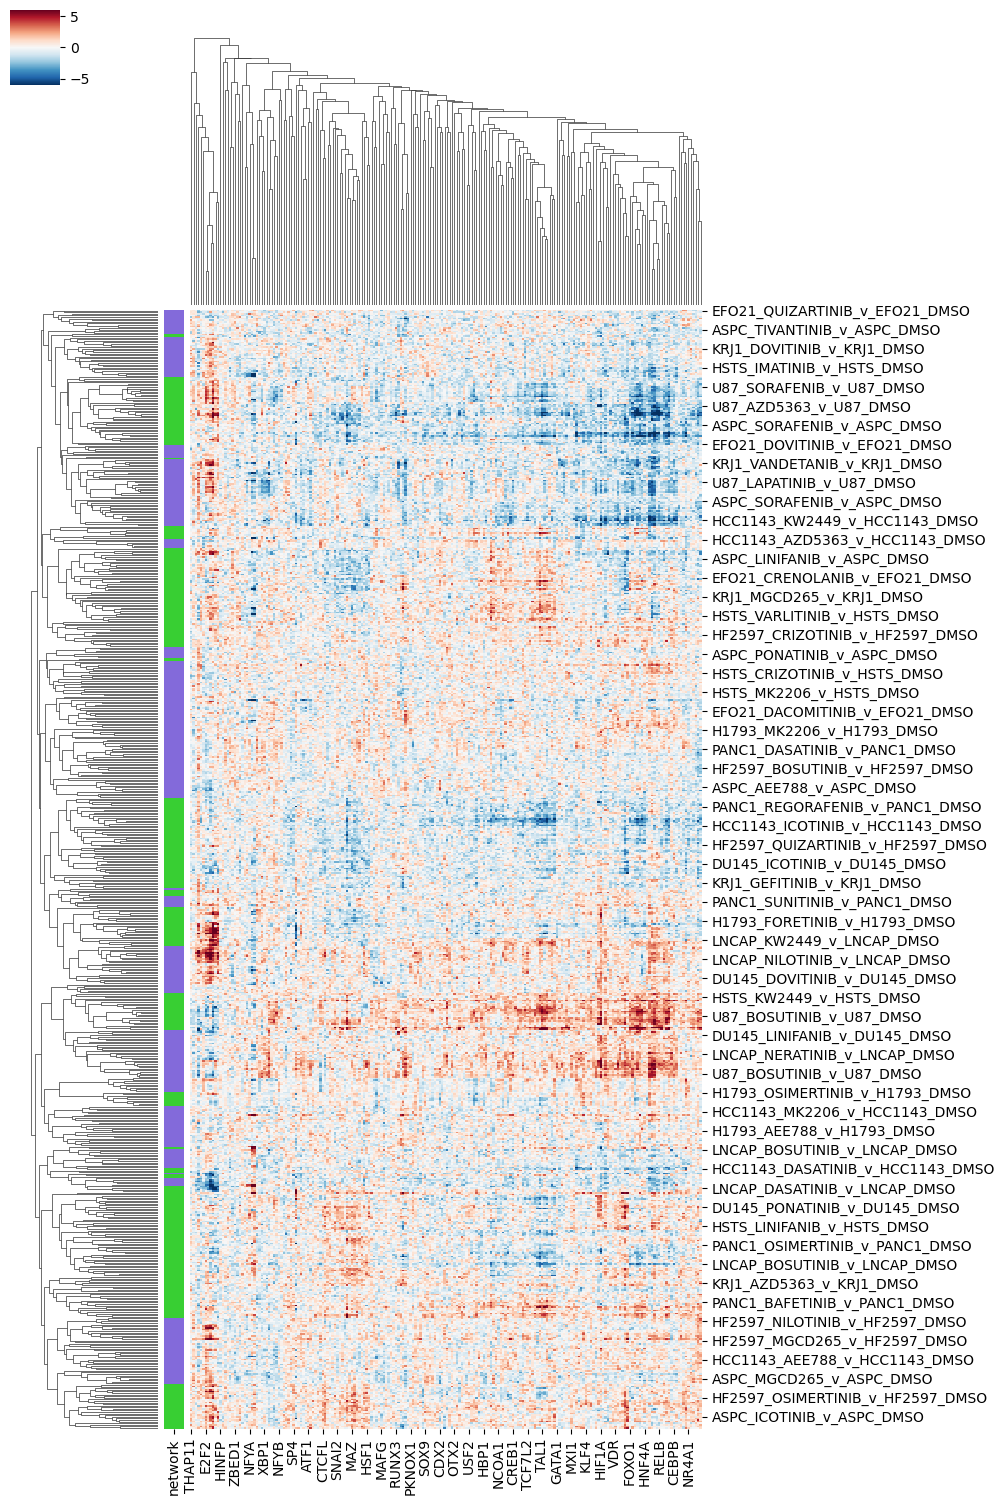

In [24]:

# Concatenate the dataframes with appropriate labels
df_collectri_acts_filtered_sorted['network'] = 'collectri'
df_dorothea_acts_filtered_sorted['network'] = 'dorothea'

combined_df = pd.concat([
    df_collectri_acts_filtered_sorted,
    df_dorothea_acts_filtered_sorted
], axis=0)

# Extract the 'source' column for use as row colors in the clustergram
row_colors = combined_df.pop('network').map({
    'collectri': "#836ada", 
    'dorothea': "#38cf33"
})

# Plot the clustergram with row colors
sns.clustermap(combined_df, metric='correlation', method='average',
               row_colors=row_colors, figsize=(10, 15), cmap='RdBu_r',
               vmin=-6, vmax=6, cbar_pos=(0, 0.95, 0.05, 0.05))

plt.show()

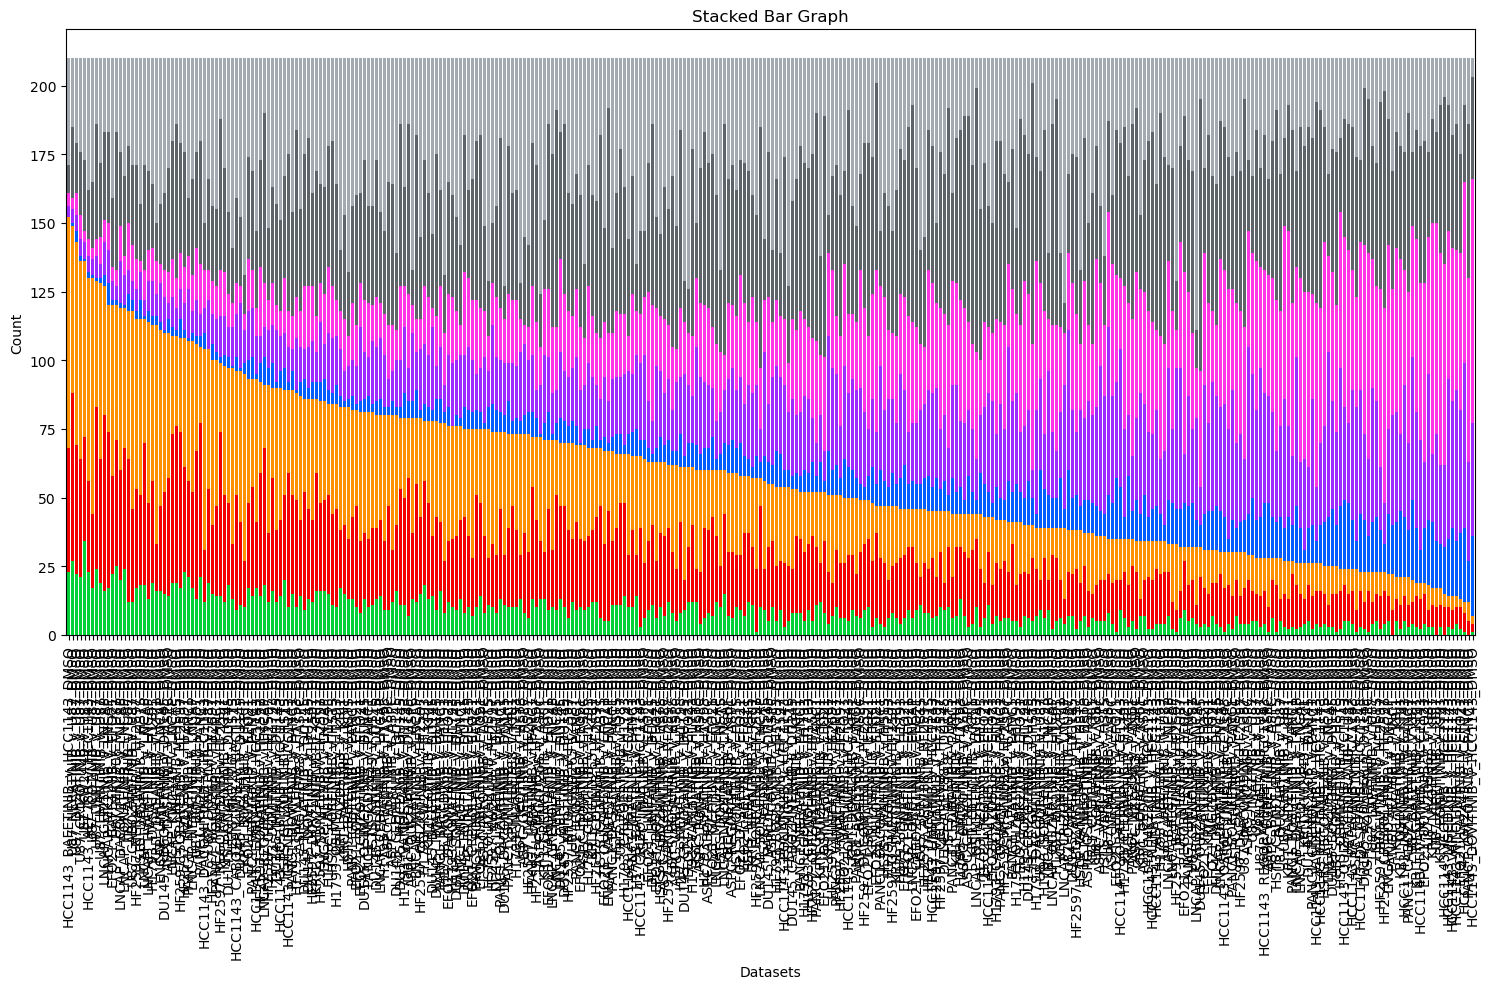

In [25]:
# Given color map
cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]

# Plotting the stacked bar graph
ax = df_classes_summary_sorted.plot(kind='bar', stacked=True, figsize=(15, 10), width=0.8, color=cmap, legend=False)

# Setting some additional attributes to make the graph more readable
ax.set_title("Stacked Bar Graph")
ax.set_ylabel("Count")
ax.set_xlabel("Datasets")

plt.tight_layout()
plt.show()


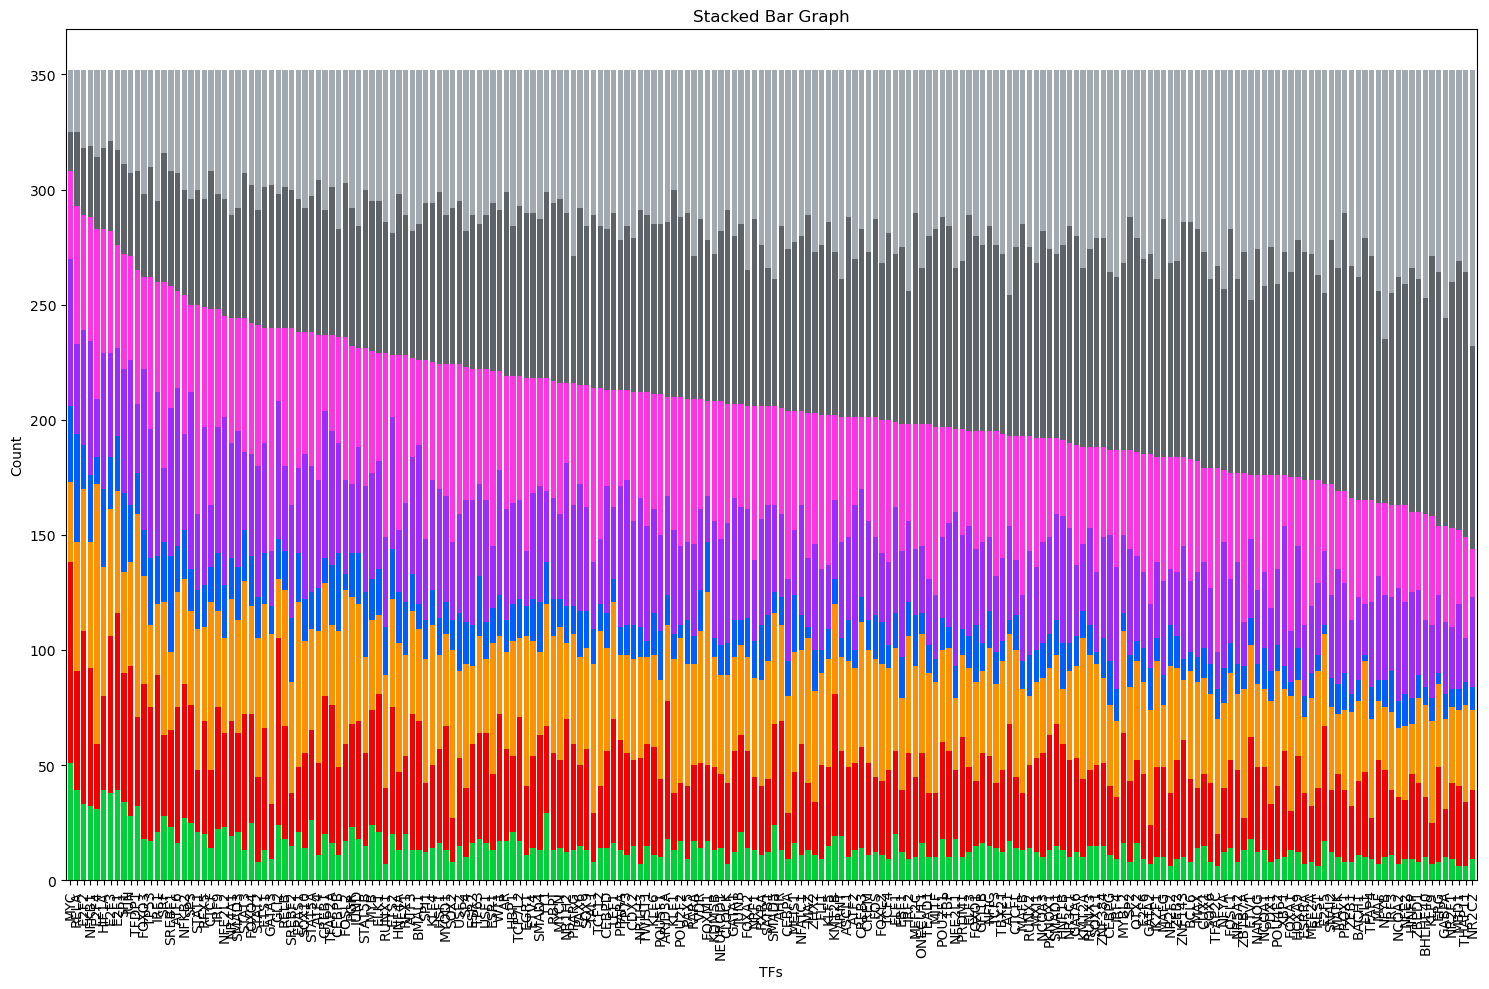

In [26]:
# Given color map
cmap = ["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"]

# Plotting the stacked bar graph
ax = df_classes_summary_sorted_cols.plot(kind='bar', stacked=True, figsize=(15, 10), width=0.8, color=cmap, legend=False)

# Setting some additional attributes to make the graph more readable
ax.set_title("Stacked Bar Graph")
ax.set_ylabel("Count")
ax.set_xlabel("TFs")

plt.tight_layout()
plt.show()

ValueError: 'c' argument has 73920 elements, which is inconsistent with 'x' and 'y' with size 74272.

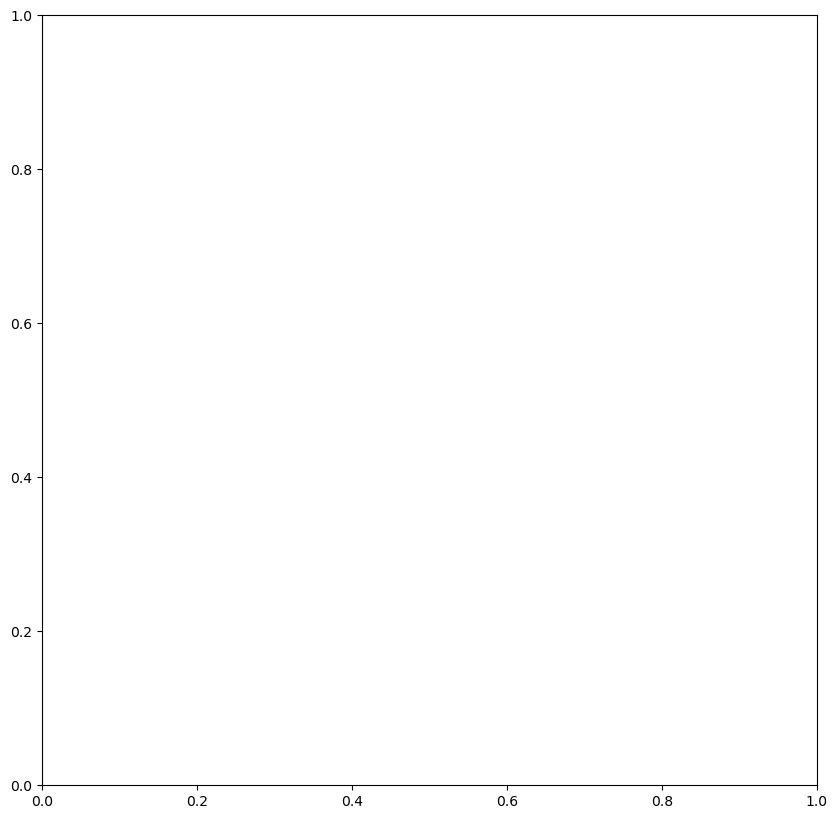

In [27]:
# Flatten the dataframes to obtain arrays
x_values = df_dorothea_acts_filtered_sorted.values.flatten()
y_values = df_collectri_acts_filtered_sorted.values.flatten()
colors = df_classes_sorted.values.flatten()

# Define the color map
cmap = ListedColormap(["#00d138","#f30000","#ff9100","#005dff","#9d2bff","#ff35e5","#5d6368","#a3a9b0"])

# Create scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x_values, y_values, c=colors, cmap=cmap, alpha=0.5, edgecolors="w", linewidth=0.5)

# Create a colorbar with proper ticks and labels
cbar = plt.colorbar(scatter, ticks=np.arange(1, 9))
cbar.set_label('Classes', rotation=270, labelpad=15)

plt.xlabel('Dorothea Values')
plt.ylabel('Collectri Values')
plt.title('Scatter plot of Dorothea vs Collectri')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Number of rows
selected = 10

# Calculate the half index of the dataframe
half_index = len(df_classes_summary_sorted_cols) // 2

# Adjust the indices for top, middle, and bottom selection based on the value of 'selected'
top_n = df_classes_summary_sorted_cols.iloc[:selected].index.tolist()
middle_n = df_classes_summary_sorted_cols.iloc[half_index - selected//2:half_index + selected//2].index.tolist()
bottom_n = df_classes_summary_sorted_cols.iloc[-selected:].index.tolist()

def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    if union == 0:
        return 0
    else:
        return intersection / union

# Calculate Jaccard Index
results = []

for tf_list, name in zip([top_n, middle_n, bottom_n], ['top_n', 'middle_n', 'bottom_n']):
    for tf in tf_list:
        for class_num in range(1, 9):
            datasets = df_classes[df_classes[tf] == class_num].index
            jaccard_values = []
            size_collectri = []
            size_dorothea = []
            weight_collectri = []
            weight_dorothea = []
            for dataset in datasets:
                columns_of_interest = df_gse186341[df_gse186341.index == dataset].dropna(axis=1).columns
                collectri_filtered = collectri[collectri['source'] == tf]
                dorothea_filtered = dorothea[dorothea['source'] == tf]
                
                targets_collectri = set(collectri_filtered['target'].tolist()) & set(columns_of_interest)
                targets_dorothea = set(dorothea_filtered['target'].tolist()) & set(columns_of_interest)
                
                jaccard_values.append(jaccard_index(targets_collectri, targets_dorothea))
                size_collectri.append(len(targets_collectri))
                size_dorothea.append(len(targets_dorothea))
                
                weight_collectri.extend(collectri_filtered[collectri_filtered['target'].isin(targets_collectri)]['weight'])
                weight_dorothea.extend(dorothea_filtered[dorothea_filtered['target'].isin(targets_dorothea)]['weight'])

            mean_jaccard = np.mean(jaccard_values)
            size_collectri_mean = np.mean(size_collectri)
            size_dorothea_mean = np.mean(size_dorothea)
            weight_collectri_mean = np.mean(weight_collectri)
            weight_dorothea_mean = np.mean(weight_dorothea)
            results.append({
                'tf_group': name,
                'tf': tf,
                'class': class_num,
                'size_collectri': size_collectri,
                'size_dorothea': size_dorothea,
                'jaccard_value': jaccard_values,
                'weight_collectri': weight_collectri,
                'weight_dorothea': weight_dorothea,
                'mean_jaccard': mean_jaccard,
                'size_collectri_mean': size_collectri_mean,
                'size_dorothea_mean': size_dorothea_mean,
                'weight_collectri_mean': weight_collectri_mean,
                'weight_dorothea_mean': weight_dorothea_mean
            })

# Convert results to dataframe for plotting
df_results = pd.DataFrame(results)

# Sort results by median_jaccard
df_results_sorted = df_results.sort_values(by=['tf_group','mean_jaccard'], ascending=[False,False])

df_results_sorted

,tf_group,tf,class,size_collectri,size_dorothea,jaccard_value,weight_collectri,weight_dorothea,mean_jaccard,size_collectri_mean,size_dorothea_mean,weight_collectri_mean,weight_dorothea_mean
3,top_n,MYC,4,"[593, 606, 563, 631, 683, 566, 581, 683, 681, ...","[346, 339, 325, 372, 397, 329, 338, 396, 395, ...","[0.45131375579598143, 0.42319277108433734, 0.4...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.439546,621.000000,360.818182,0.823940,0.912992
5,top_n,MYC,6,"[664, 662, 682, 592, 594, 632, 595, 683, 608, ...","[388, 388, 397, 347, 349, 372, 348, 395, 358, ...","[0.4312925170068027, 0.4324693042291951, 0.440...","[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.439434,616.473684,358.947368,0.817468,0.911144
7,top_n,MYC,8,"[607, 581, 567, 577, 681, 681, 661, 681, 604, ...","[358, 340, 327, 337, 396, 396, 387, 396, 356, ...","[0.43601190476190477, 0.4549763033175355, 0.44...","[1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.439022,638.629630,371.925926,0.822769,0.912169
2,top_n,MYC,3,"[656, 581, 631, 607, 578, 663, 595, 580, 594, ...","[382, 342, 371, 358, 337, 388, 349, 338, 347, ...","[0.4297520661157025, 0.4558359621451104, 0.431...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.438085,617.571429,359.542857,0.820680,0.913223
0,top_n,MYC,1,"[631, 632, 596, 612, 681, 594, 632, 605, 662, ...","[371, 372, 348, 343, 396, 347, 372, 357, 388, ...","[0.43142857142857144, 0.4322396576319544, 0.44...","[1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.437999,619.862745,361.176471,0.820454,0.912812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,bottom_n,NR2C2,4,"[32, 34, 28, 28, 28, 39, 32, 28, 37, 37]","[86, 82, 84, 72, 75, 85, 86, 83, 84, 84]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000,32.300000,82.100000,0.888545,1.000000
236,bottom_n,NR2C2,5,"[24, 23, 36, 26, 26, 24, 34, 31, 23, 32, 28, 3...","[79, 80, 84, 72, 72, 78, 83, 74, 80, 86, 72, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000,30.333333,80.256410,0.896872,1.000000
237,bottom_n,NR2C2,6,"[31, 34, 28, 38, 21, 24, 22, 35, 35, 35, 28, 2...","[77, 82, 83, 84, 79, 78, 80, 84, 84, 82, 72, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000,32.142857,80.809524,0.881481,1.000000
238,bottom_n,NR2C2,7,"[34, 28, 28, 23, 34, 24, 32, 28, 26, 31, 35, 2...","[82, 83, 83, 80, 82, 78, 85, 83, 72, 73, 84, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.000000,29.295455,78.613636,0.905353,1.000000


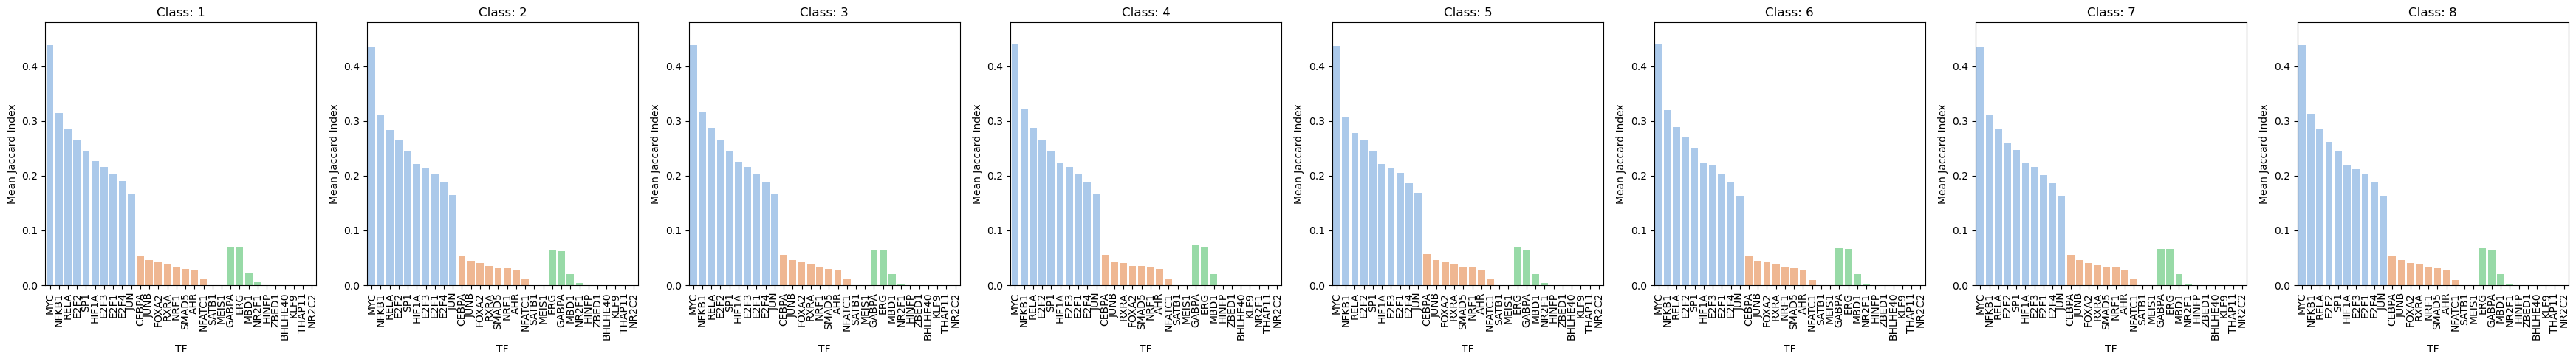

In [ ]:
# Number of unique classes
num_classes = df_results_sorted['class'].nunique()

# Create a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(35,5))

# Iterate through each class and plot
for i, (cls, grp) in enumerate(df_results_sorted.groupby('class')):
    ax = axes[i]
    sns.barplot(data=grp, x='tf', y='mean_jaccard', hue='tf_group', ax=ax, dodge=False, palette="pastel")
    ax.set_title(f'Class: {cls}')
    ax.set_ylabel('Mean Jaccard Index')
    ax.set_xlabel('TF')
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylim([0, 0.48])

plt.tight_layout()
plt.show()


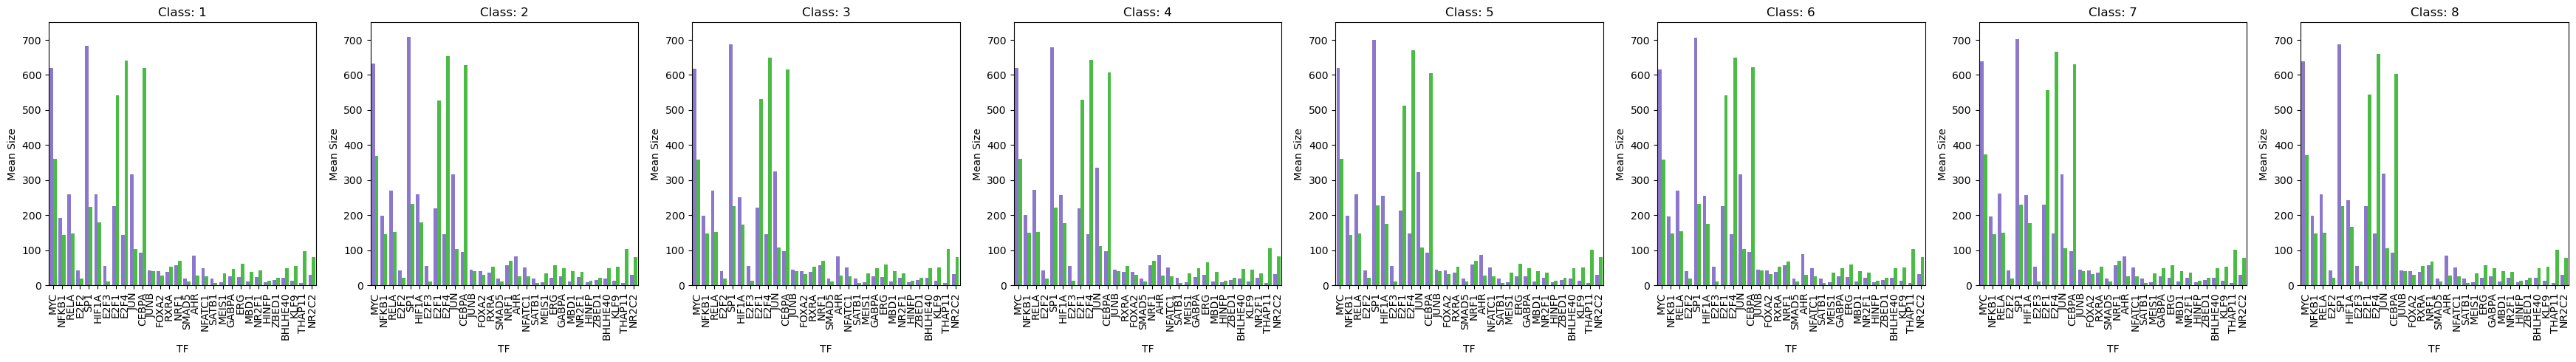

In [ ]:
# Melt df_results_sorted for the sizes
df_melted_size = pd.melt(df_results_sorted, id_vars=['tf', 'tf_group', 'class'], value_vars=['size_collectri_mean', 'size_dorothea_mean'], 
                    var_name='dataset', value_name='median_size')

# Create a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(35, 5))

cmap = ["#836ada", "#38cf33"]

# Iterate through each class and plot
for i, (cls, grp) in enumerate(df_melted_size.groupby('class')):
    ax = axes[i]
    sns.barplot(data=grp, x='tf', y='median_size', hue='dataset', ax=ax, palette=cmap)
    ax.set_title(f'Class: {cls}')
    ax.set_ylabel('Mean Size')
    ax.set_xlabel('TF')
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylim([0, 750])

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(1, 1)).remove()

plt.tight_layout()
plt.show()


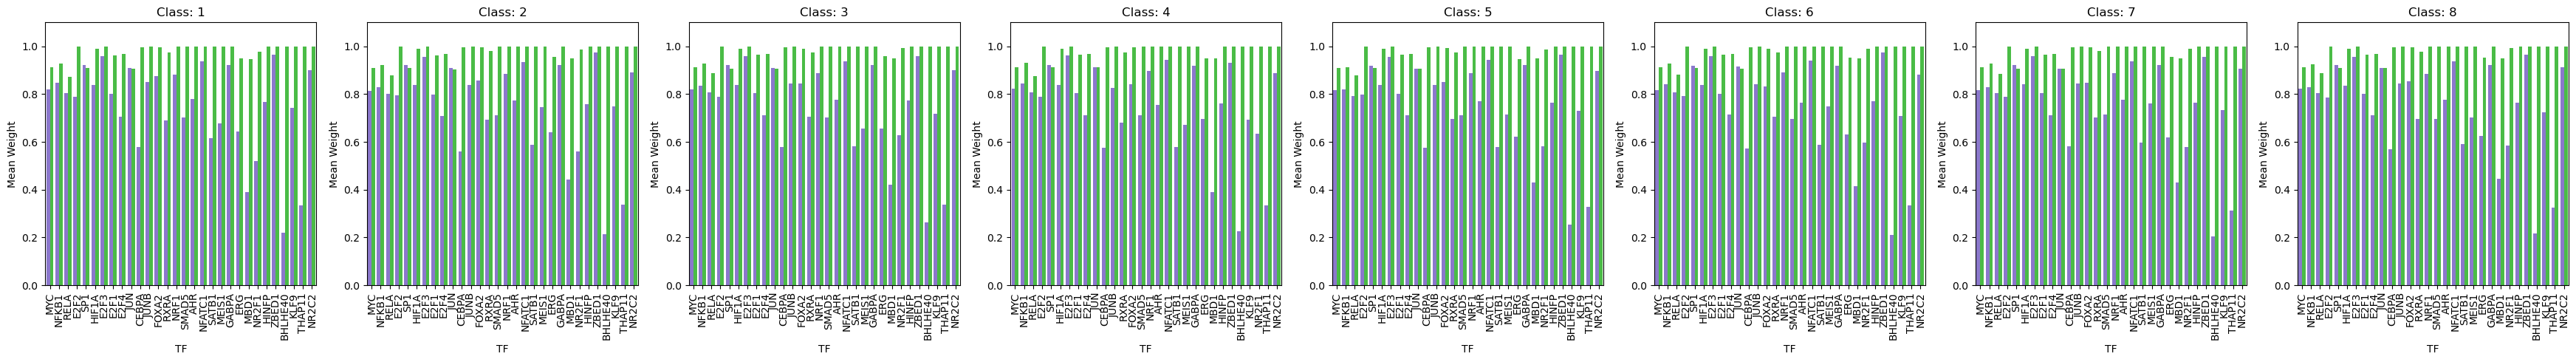

In [ ]:
# Melt df_results_sorted for the sizes
df_melted_weight = pd.melt(df_results_sorted, id_vars=['tf', 'tf_group', 'class'], value_vars=['weight_collectri_mean', 'weight_dorothea_mean'], 
                    var_name='dataset', value_name='mean_weight')

# Create a grid of plots
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(35, 5))

cmap = ["#836ada", "#38cf33"]

# Iterate through each class and plot
for i, (cls, grp) in enumerate(df_melted_weight.groupby('class')):
    ax = axes[i]
    sns.barplot(data=grp, x='tf', y='mean_weight', hue='dataset', ax=ax, palette=cmap)
    ax.set_title(f'Class: {cls}')
    ax.set_ylabel('Mean Weight')
    ax.set_xlabel('TF')
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylim([0, 1.1])

# Add a legend
fig.legend(loc='upper left', bbox_to_anchor=(1, 1)).remove()

plt.tight_layout()
plt.show()

### Significant TF on each dataset